## ABC

In [19]:
import sbi
import sbi.simulators
from sbi.models.abc import abc_inference, abc_method1, abc_method2
import numpy as np
import jax

In [20]:
np.random.seed(21)

In [21]:
linear_sim = sbi.simulators.LinearSimulator(sigma_noise=0.1)
uniform_prior = sbi.simulators.UniformPrior(-2, 2, dim=2)

In [22]:
x_obs = np.random.normal(size=(2,))
y_obs = np.array(0.3)

In [23]:
from sbi.models.abc import abc_method1

samples_pos = abc_method1(N=100, Nsamples=1000, simulator_func=linear_sim.simulate_numpy, prior=uniform_prior.sample_numpy, x=x, obs=y_obs)

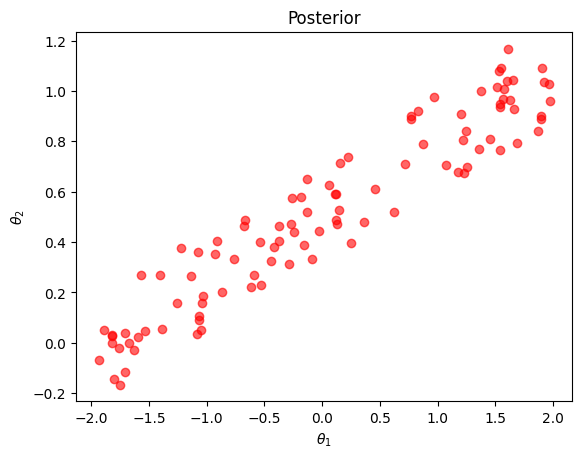

In [24]:
import matplotlib.pyplot as plt

plt.scatter(samples_pos[:, 0], samples_pos[:, 1], alpha = 0.6, color='red')
plt.title('Posterior')
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.show()

### Method 1

In [9]:
# Parameters
eps = 0.01 # threshold
obs = 0.3 # y_true
N = 100 # Number of accepted samples
Nsamples = 10_000 # Number of generated samples
dim = 2 # dimension of parameter space
np.random.seed(42)
x = np.random.uniform(-0.5, 0.5, size=(dim,)).astype(np.float32)
print(f"X parameter is: {x}")
np.random.seed(None)
simulator_func=simulator2


samples_pos1 = abc_method1(N, Nsamples, simulator_func, prior, dim, x, obs)
print (f" The number of posterior samples 1 is : {samples_pos1.shape[0]}\n")
print(f"The mean value of posterior 1 is : {samples_pos1.mean(axis=0)}\n")
print(f"The standard deviation of posterior 1 is : {samples_pos1.std(axis=0)}")

samples_pos2 = abc_method2(Nsamples, eps, simulator_func, prior, dim, x, obs, batch_size=100)
print("--"*50)
print(f"The number of posterior samples 2 is : {samples_pos2.shape[0]}\n")
print(f"The mean value of posterior 2 is : {samples_pos2.mean(axis=0)}\n")
print(f"The standard deviation of posterior 2 is : {samples_pos2.std(axis=0)}")

                      

X parameter is: [-0.12545988  0.45071432]
 The number of posterior samples 1 is : 100

The mean value of posterior 1 is : [-0.11224886  0.61299235]

The standard deviation of posterior 1 is : [1.1595412 0.3660004]
----------------------------------------------------------------------------------------------------
The number of posterior samples 2 is : 101

The mean value of posterior 2 is : [0.04098506 0.67887366]

The standard deviation of posterior 2 is : [1.140356   0.38586056]


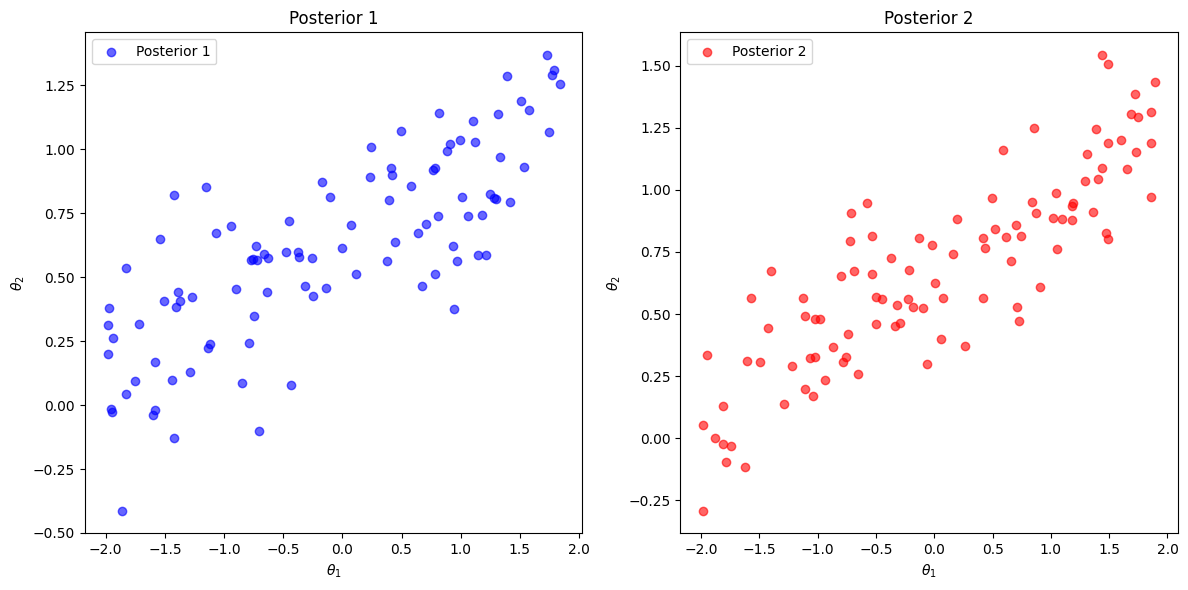

In [10]:
# Plot figures
import matplotlib.pyplot as plt

# Plot figures
fig, axes = plt.subplots(1,2, figsize=(12,6)) 

# Scatter plots for the posteriors from abc_methods
axes[0].scatter(samples_pos1[:,0], samples_pos1[:,1], alpha = 0.6, color='blue', label='Posterior 1')
axes[0].set_title('Posterior 1')
axes[0].set_xlabel(r"$\theta_1$")
axes[0].set_ylabel(r"$\theta_2$")
axes[0].legend()

axes[1].scatter(samples_pos2[:, 0], samples_pos2[:, 1], alpha = 0.6, color='red', label='Posterior 2')
axes[1].set_title('Posterior 2')
axes[1].set_xlabel(r"$\theta_1$")
axes[1].set_ylabel(r"$\theta_2$")
axes[1].legend()

plt.tight_layout()
plt.show()



## JAX implementation

In [17]:
import jax
key = jax.random.PRNGKey(42)
keys = jax.random.split(key, th.shape[0])
keys.shape

linear_sim.simulate_jax(th, x, keys).shape

uniform_prior.sample_numpy(N=100)

N = 100
keys = jax.random.split(keys[-1], N)
uniform_prior.sample_jax(N, keys)

Array([[-1.83668518e+00, -1.98877239e+00],
       [ 1.55412102e+00,  1.76236629e-01],
       [-4.10545826e-01,  2.64301777e-01],
       [-1.63494873e+00,  4.37813282e-01],
       [ 3.51151466e-01,  4.87609386e-01],
       [-2.25870609e-01,  1.20445824e+00],
       [ 1.45950747e+00,  9.55573559e-01],
       [-1.97780800e+00,  2.47403145e-01],
       [-4.94472980e-01, -1.79713678e+00],
       [-2.84366608e-02,  1.50685120e+00],
       [-1.76228666e+00,  6.89897060e-01],
       [ 1.32886791e+00, -1.26713753e+00],
       [ 8.01070213e-01,  5.50084591e-01],
       [ 5.38825035e-01, -6.54768944e-02],
       [-9.62443352e-02, -9.28780556e-01],
       [-1.05845547e+00,  2.47547626e-01],
       [ 4.62444782e-01, -1.42341232e+00],
       [ 1.20139027e+00,  1.47890568e+00],
       [ 8.22328568e-01,  1.70625067e+00],
       [-3.12254429e-01,  2.91287422e-01],
       [ 1.81201124e+00, -1.54577971e+00],
       [-6.14090919e-01,  3.40662479e-01],
       [-1.25219440e+00, -1.88448668e+00],
       [-1.

In [12]:
import jax
import jax.numpy as jnp
from jax import random

from sbi.simulators import simulator_jax, prior_jax
from sbi.models.abc import abc_jax

In [13]:
key = random.PRNGKey(42)
N = 100
Nsamples = 10000
dim = 2
x = random.uniform(key, shape=(dim,), minval=-0.5, maxval=0.5, dtype=jnp.float32)
print(f"X fixed value is: {x}")
obs = 0.3
simulator_func = simulator_jax

samples_pos_jax = abc_jax(N, Nsamples, simulator_func, prior_jax, dim, x, obs, key)

print (f" The number of posterior samples 1 is : {samples_pos_jax.shape[0]}\n")
print(f"The mean value of posterior 1 is : {samples_pos_jax.mean(axis=0)}\n")
print(f"The standard deviation of posterior 1 is : {samples_pos_jax.std(axis=0)}")

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


X fixed value is: [-0.48499     0.17896283]
 The number of posterior samples 1 is : 100

The mean value of posterior 1 is : [-0.6811415 -0.1049917]

The standard deviation of posterior 1 is : [0.5084322 1.1232182]


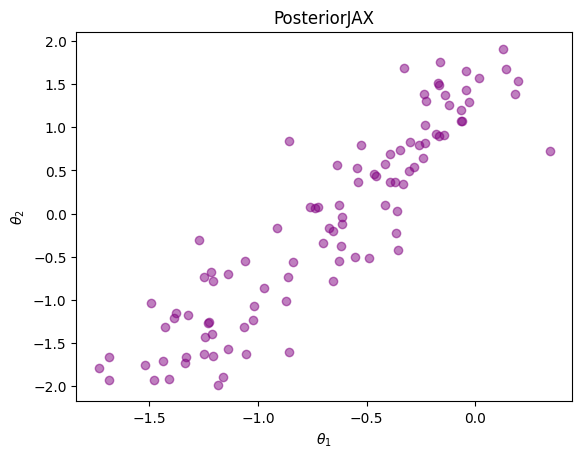

In [14]:
import matplotlib.pyplot as plt

plt.scatter(samples_pos_jax[:, 0], samples_pos_jax[:, 1], alpha = 0.5, color='purple')
plt.title('PosteriorJAX')
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.show()

## OMC

In [15]:
import numpy as np
from sbi.simulators import prior, simulator_omc
from sbi.models.omc import OMCInference

ModuleNotFoundError: No module named 'simulators'

In [4]:
# Define the dimensions and number of samples
N=10000
theta_dim, u_dim = 5, 5 # Dimensions of theta, # Dimension of nuisance variables

# Observation
y_obs = np.full(theta_dim, 0.3) # Assuming y has the same dimension as simulator output
np.random.seed(42)

# Fixed x from a uniform distribution
x_fixed = np.random.uniform(-1,1, theta_dim)

# Sampling thetas from the prior
theta_pr = prior(N, theta_dim)

# Run Inference 
omc_inference = OMCInference(theta_pr, y_obs, x_fixed, u_dim)
samples_pos, weights = omc_inference.infer()
print(f"The number of samples is: {samples_pos.shape[0]}")

# Calculate weighted mean and std for each dimnensioin of theta
weighted_mean = np.average(samples_pos, weights = weights, axis=0)
weighted_variance = np.average((samples_pos - weighted_mean)**2, weights = weights, axis=0)
weighted_std = np.sqrt(weighted_variance)

print(f"The mean value of the posterior distribution is: {weighted_mean}")
print(f"The standard deviation of the posterior distribution is: {weighted_std}")

The number of samples is: 10000
The mean value of the posterior distribution is: [ 0.00538229 -0.02723251 -0.00138771  0.01190336 -0.01144511]
The standard deviation of the posterior distribution is: [1.15842172 1.15358599 1.15297844 1.15212796 1.15044569]


In [5]:
weights.shape

(10000,)

In [7]:
y_obs

array([0.3, 0.3, 0.3, 0.3, 0.3])

In [9]:
theta_pr.shape

(10000, 5)

In [10]:
non_zero_mask = weights>0
filtered_samples = samples_pos[non_zero_mask]
filtered_weights = weights[non_zero_mask]
print(f"The number of the non-negative samples are: {filtered_samples.shape}")

The number of the non-negative samples are: (10000, 5)
